## Insurance_Case_Study

In [1]:
#import the libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
os.chdir('C:\\Users\\DELL\\Downloads\\Python Notebook\\Case Study 3 - Insurance Claims Case Study')

In [3]:
claims = pd.read_csv('claims.csv')

In [4]:
cust_data = pd.read_csv('cust_demographics.csv')

In [5]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [7]:
# Merging the above two datasets

In [8]:
df = pd.merge(cust_data,claims,left_on='CUST_ID',right_on='customer_id',how='outer')

In [9]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [10]:
# Drop the column customer_id as it is repeated now

In [11]:
df.drop(columns='customer_id',axis=1,inplace=True)

In [12]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [13]:
df.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [14]:
#Change the datatype of claim_date and DateOfBirth object to datetime

In [15]:
df['claim_date'] = pd.to_datetime(df['claim_date'],format='%m/%d/%Y')
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'],format='%d-%b-%y')
df['Contact'] = df['Contact'].str.replace('-','').astype(float)

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the '$' sign.

In [16]:
#change the datatype of claim_amount object to float

In [17]:
df['claim_amount'] = df['claim_amount'].str.replace('$','').astype(float)

In [18]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [19]:
df['alert_flag'] = np.where(df['police_report'] == 'Unknown' ,1,0)

In [20]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [21]:
df = df.groupby('CUST_ID').first().reset_index(drop=True)

In [22]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
df.isnull().sum()      #checking the null values

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [24]:
#claim_amount is continuous column as it filled with mean values

df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())
df['total_policy_claims'] = df['total_policy_claims'].fillna(df['total_policy_claims'].mean())

In [25]:
# ccategorical columns are filled with mode values

catagorical_col = ["incident_cause","claim_area","claim_type","fraudulent"]

In [26]:
for col in catagorical_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [27]:
df.isnull().sum() 

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               7
incident_cause         0
claim_date             7
claim_area             0
police_report          7
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
- Children < 18
- Youth 18-30
- Adult 30-60
- Senior > 60

In [28]:
curr_year = pd.to_datetime('today').year
curr_year

2024

In [29]:
df['DateOfBirth']=df['DateOfBirth'].dt.year

In [30]:
df['Birth_Year']=np.where(df['DateOfBirth']>curr_year,df['DateOfBirth']-100,df['DateOfBirth'])   

In [31]:
df['Age']=curr_year -df['Birth_Year']

In [32]:
df['Age_Group']=np.where((df['Age'].astype(int)<18),"Children",np.where(((df['Age'].astype(int)>18) & (df['Age'].astype(int)<30)),"Youth",
                                     np.where(((df['Age'].astype(int)>=30) & (df['Age'].astype(int)<60)),"Adult","Senior" )))

In [33]:
df.groupby(by = 'Age_Group').count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age
Age_Group,,,,,,,,,,,,,,,,,
Adult,810,810,810,810,810,805,810,805,810,805,810,810,810,810,810,810,810
Senior,133,133,133,133,133,132,133,132,133,132,133,133,133,133,133,133,133
Youth,142,142,142,142,142,141,142,141,142,141,142,142,142,142,142,142,142


In [34]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age,Age_Group
0,Female,1978,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,1978,46,Adult
1,Male,1972,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,1972,52,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [35]:
df.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12755.710930
Platinum    12370.138663
Silver      12271.163192
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [36]:
df[df.claim_date < '2018-09-10'].groupby('incident_cause')['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.244625e+05
1,Driver error,3.264286e+06
2,Natural causes,1.312706e+06
3,Other causes,3.725038e+06
4,Other driver error,3.318806e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [37]:
df[(df.incident_cause.str.lower().str.contains('driver')) & (df.Age_Group =='Adult') & ((df.State == 'TX') | (df.State == 'DE') | (df.State == 'AK'))].groupby('State')['State'].count()

State
AK     9
DE    10
TX     8
Name: State, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
pie_chart = pd.pivot_table(data = df,index='Segment',columns='gender',values='claim_amount',aggfunc='sum')

In [39]:
pie_chart

gender,Female,Male
Segment,,
Gold,2.122234e+06,2.622890e+06
Platinum,2.381974e+06,2.120756e+06
Silver,1.935970e+06,2.346666e+06


<Figure size 300x300 with 0 Axes>

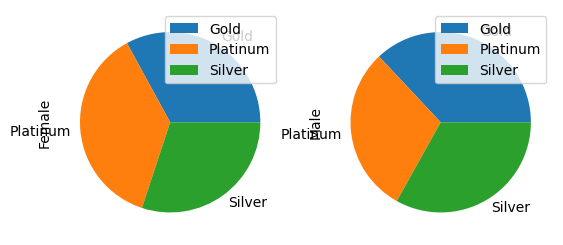

In [40]:
plt.figure(figsize=(3,3))
pie_chart.plot(kind='pie',subplots=True)
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [41]:
bar_chart = df[(df.incident_cause.str.lower().str.contains('driver'))].groupby('gender')['gender'].count()
bar_chart

gender
Female    221
Male      280
Name: gender, dtype: int64

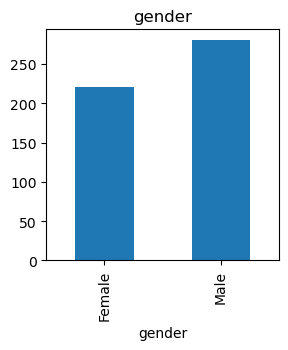

In [42]:
plt.figure(figsize=(3,3))
bar_chart.plot(kind='bar',subplots=True)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [43]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age,Age_Group
0,Female,1978,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,1978,46,Adult
1,Male,1972,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,1972,52,Adult


In [44]:
max_fraudulent_claims = df.groupby('Age_Group')['fraudulent'].count().reset_index()
max_fraudulent_claims

,Age_Group,fraudulent
0,Adult,810
1,Senior,133
2,Youth,142


<Figure size 300x200 with 0 Axes>

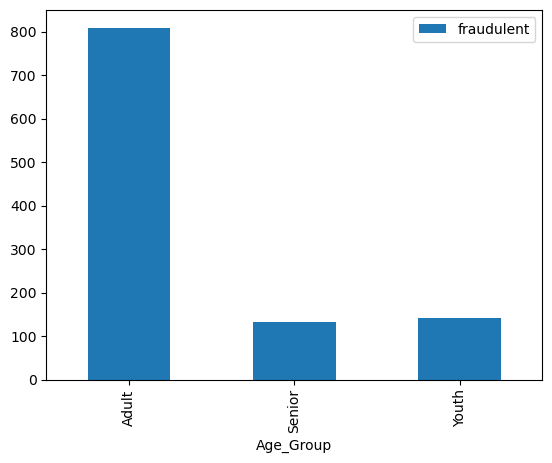

In [45]:
plt.figure(figsize=(3,2))
max_fraudulent_claims.plot(kind='bar',x='Age_Group',y='fraudulent')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [46]:
df['claim_month'] = df['claim_date'].apply(lambda x: x.month)

In [47]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age,Age_Group,claim_month
0,Female,1978,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,1978,46,Adult,4.0
1,Male,1972,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,1972,52,Adult,4.0


In [48]:
monthly_trend= df.groupby('claim_month')['claim_amount'].sum().reset_index()
monthly_trend

,claim_month,claim_amount
0,1.0,1.332012e+06
1,2.0,1.133107e+06
2,3.0,1.320094e+06
3,4.0,1.276071e+06
4,5.0,1.114211e+06
5,6.0,1.276333e+06
6,7.0,1.379035e+06
7,8.0,9.112035e+05
8,9.0,9.806480e+05
9,10.0,1.422655e+06


<Figure size 600x200 with 0 Axes>

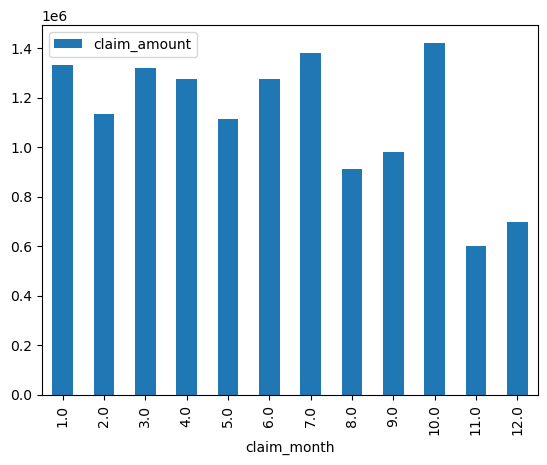

In [49]:
plt.figure(figsize=(6,2))
monthly_trend.plot(kind='bar',x='claim_month',y='claim_amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

In [50]:
fraud_claims = df[df.fraudulent == 'Yes'].groupby(['gender','Age_Group'])['claim_amount'].mean().reset_index()
fraud_claims

,gender,Age_Group,claim_amount
0,Female,Adult,12807.694313
1,Female,Senior,4860.840909
2,Female,Youth,9680.356931
3,Male,Adult,15617.515372
4,Male,Senior,15424.153846
5,Male,Youth,9702.227138


In [51]:
non_fraud_claims = df[df.fraudulent == 'No'].groupby(['gender','Age_Group'])['claim_amount'].mean().reset_index()
non_fraud_claims

,gender,Age_Group,claim_amount
0,Female,Adult,12741.634800
1,Female,Senior,11604.299770
2,Female,Youth,11392.482378
3,Male,Adult,12035.930923
4,Male,Senior,11567.943340
5,Male,Youth,13593.541543


In [52]:
Avg_claim_amount=pd.pivot_table(data=df,index=["Age_Group","gender"],columns=['fraudulent'],
                                       values='claim_amount',aggfunc='mean')

In [53]:
Avg_claim_amount

fraudulent                  No           Yes
Age_Group gender                            
Adult     Female  12741.634800  12807.694313
          Male    12035.930923  15617.515372
Senior    Female  11604.299770   4860.840909
          Male    11567.943340  15424.153846
Youth     Female  11392.482378   9680.356931
          Male    13593.541543   9702.227138

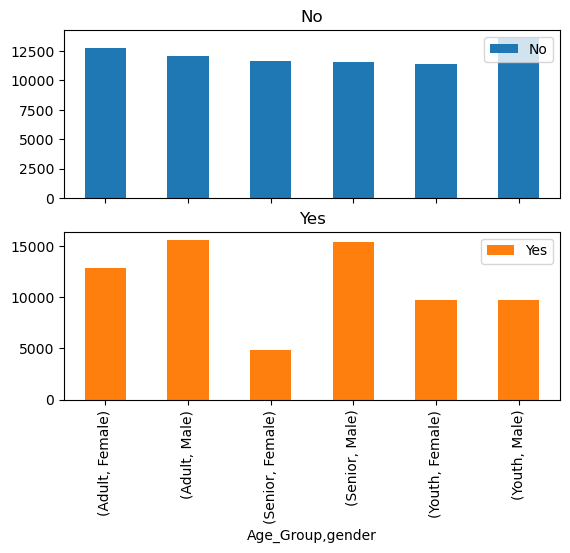

In [54]:
Avg_claim_amount.plot(kind="bar",subplots=True)
plt.show()

### 16. Is there any similarity in the amount claimed by males and females?

In [55]:
claims_male = df["claim_amount"].loc[df["gender"]=="Male"]
claims_female = df["claim_amount"].loc[df["gender"]=="Female"]

In [56]:
claims_male.mean()

12821.54239372783

In [57]:
claims_female.mean()

12105.597649726487

In [58]:
import scipy.stats as stats

In [59]:
equal_variance = stats.ttest_ind(a= claims_male, b= claims_female,equal_var=True)    

In [60]:
equal_variance.statistic

0.8848199716864555

In [61]:
unequal_variance = stats.ttest_ind(a= claims_male, b= claims_female, equal_var=False)    
unequal_variance.statistic

0.8854208549896035

In [62]:
unequal_variance.statistic - equal_variance.statistic

0.0006008833031480032

In [63]:
# so, we calculate p value with equal_variance
p_value = equal_variance.pvalue
p_value

0.37645013430168395

In [64]:
if (p_value > 0.05):
    print("we fail to reject the null hypothesis.There is no relationship between the two")
else:
    print("we accept the null hypothesis.There is some relationship between the two")

we fail to reject the null hypothesis.There is no relationship between the two


### 17. Is there any relationship between age category and segment?

In [65]:
age_segment = pd.crosstab(df['Age_Group'],df['Segment'],margins=True)

In [66]:
age_segment

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,279,273,258,810
Senior,45,47,41,133
Youth,48,44,50,142
All,372,364,349,1085


In [67]:
chi_test=stats.chi2_contingency(observed= age_segment)
chi_test

Chi2ContingencyResult(statistic=0.9426515410041357, pvalue=0.999558688350939, dof=9, expected_freq=array([[ 277.71428571,  271.74193548,  260.5437788 ,  810.        ],
       [  45.6       ,   44.61935484,   42.78064516,  133.        ],
       [  48.68571429,   47.63870968,   45.67557604,  142.        ],
       [ 372.        ,  364.        ,  349.        , 1085.        ]]))

In [68]:
chi_test.pvalue

0.999558688350939

In [69]:
chi_test.statistic

0.9426515410041357

In [70]:
#p value is greater than 0.05, we accept the null hypothesis. 
#Therefore there is no relationship between age category and segment

In [71]:
chi_test.pvalue > 0.05

True

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [72]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age,Age_Group,claim_month
0,Female,1978,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,1978,46,Adult,4.0
1,Male,1972,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,1972,52,Adult,4.0


In [73]:
df['claim_year']=df['claim_date'].dt.year

In [74]:
df['claim_year'].value_counts()

claim_year
2017.0    597
2018.0    481
Name: count, dtype: int64

In [75]:
df.groupby('claim_year')['claim_amount'].mean().reset_index()

,claim_year,claim_amount
0,2017.0,12295.850007
1,2018.0,12687.266008


In [76]:
claim_2017 = df.claim_amount[df.claim_year==2017]
claim_2018 = df.claim_amount[df.claim_year==2018]

In [77]:
claim_2017 

2        1621.5
7       21190.0
8        2490.0
10      25010.0
11      30540.0
         ...   
1072     1550.0
1073     2840.0
1074     2370.0
1079     2260.0
1083     2415.0
Name: claim_amount, Length: 597, dtype: float64

In [78]:
# perfroming the t test

In [79]:
stats.ttest_ind(claim_2017 ,claim_2018)

TtestResult(statistic=-0.4777952749526742, pvalue=0.6328929702726953, df=1076.0)

### 19. Is there any difference between age groups and insurance claims?

In [80]:
#converting age-group into categorical variable

In [81]:
df['Age_Group_cate'] = np.where((df.Age.astype(int)<18),1,np.where(((df.Age.astype(int)>18) & (df.Age.astype(int)<30)),2,
                                                    np.where(((df.Age.astype(int)>=30) & (df.Age.astype(int)<60)),3,4)))

In [82]:
df.head(2)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,...,claim_amount,total_policy_claims,fraudulent,alert_flag,Birth_Year,Age,Age_Group,claim_month,claim_year,Age_Group_cate
0,Female,1978,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,...,12470.498519,1.0,Yes,0,1978,46,Adult,4.0,2018.0,3
1,Male,1972,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,...,39192.000000,1.0,Yes,0,1972,52,Adult,4.0,2018.0,3


In [83]:
df['total_policy_claims'].value_counts()

total_policy_claims
1.000000    781
2.000000    104
3.000000     86
4.000000     58
5.000000     27
1.582397     17
6.000000      9
7.000000      2
8.000000      1
Name: count, dtype: int64

In [84]:
ageGrp_claims = pd.crosstab(df['Age_Group_cate'],df['total_policy_claims'],margins=True)
ageGrp_claims

total_policy_claims,1.0,1.5823970037453183,2.0,3.0,4.0,5.0,6.0,7.0,8.0,All
Age_Group_cate,,,,,,,,,,
2,99,3,13,11,9,6,0,0,1,142
3,585,12,81,66,38,17,9,2,0,810
4,97,2,10,9,11,4,0,0,0,133
All,781,17,104,86,58,27,9,2,1,1085


In [85]:
#Performing the chi test 

In [86]:
observed = stats.chi2_contingency(ageGrp_claims)

In [87]:
observed.statistic

17.256445644433594

In [88]:
observed.pvalue

0.9246057815000002

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [89]:
#checking the corelation betweeon claimed amount and total_policy claims
df.total_policy_claims.corr(other=df.claim_amount)

-0.014291136186627333

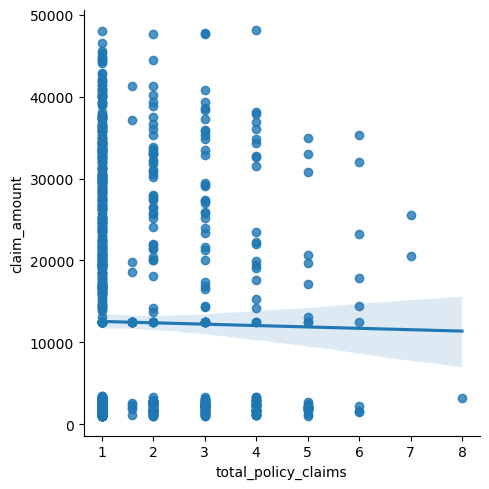

In [90]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = df)